In [ ]:
# D:\personal\semester\Bytewise fellowship\Task with data\Images

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


dataset_dir = 'D:\\personal\\semester\\Bytewise fellowship\\Task with data\\Images'


datagen = ImageDataGenerator(rescale=1./255)


generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),  
    batch_size=2,         
    class_mode='categorical' 

images, labels = next(generator)
print(images.shape)  
print(labels.shape)  


Found 5 images belonging to 3 classes.
(2, 64, 64, 3)
(2, 3)


# CNN model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#  Here Defining the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(generator.num_classes, activation='softmax')  
])

# Now Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Then Print the model summary
model.summary()


c:\Users\kkrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,587 (2.61 MB)

 Trainable params: 683,587 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [4]:

history = model.fit(
    generator,
    steps_per_epoch=1,  
    epochs=50
)




Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 1.0236
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0000e+00 - loss: 1.1861
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 1.0602
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.9420
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 1.0229
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 1.1311
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.0000e+00 - loss: 1.1015
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.9300
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0000e+00 - loss: 1.0076
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/s

# Evaluate the model

In [6]:

validation_generator = datagen.flow_from_directory(
     'D:\personal\semester\Bytewise fellowship\Task with data\Images',
     target_size=(64, 64),
     batch_size=2,
     class_mode='categorical'
 )
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc:.4f}")

Found 5 images belonging to 3 classes.


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\kkrab\AppData\Local\Temp\ipykernel_9928\2526577690.py:4: SyntaxWarning: invalid escape sequence '\p'
  'D:\personal\semester\Bytewise fellowship\Task with data\Images',


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.2027 
Validation accuracy: 1.0000


# Image Segmentation

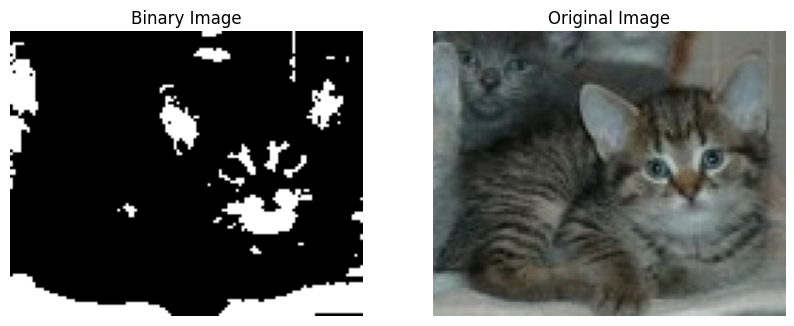

In [11]:
import cv2
import matplotlib.pyplot as plt


image_path = 'D:\\personal\\semester\\Bytewise fellowship\\Task with data\\Images\\cat\\cat_0011.jpg'


image = cv2.imread(image_path)

if image is None:
    raise ValueError("Image not found or path is incorrect.")


image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
